Passo 1 - Importar as bibliotecas

In [36]:
%pip install yfinance==0.2.58
%pip install mplcyberpunk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [37]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcyberpunk

plt.style.use("cyberpunk")

Passo 2 - pegar os dados do Yahoo Finance

In [38]:
ticker = "ALPA4.SA"
tabela_de_dados = yf.download(ticker, start= "2021-05-27", end= "2025-04-30", auto_adjust= False)



[*********************100%***********************]  1 of 1 completed


Passo 3 - Definir as janelas das médias móveis 

In [39]:
janela_rapida = 7
janela_lenta = 40

Passo 4 - Calcular as médias móveis

In [40]:
tabela_de_dados["Média Rápida"] = tabela_de_dados["Adj Close"].rolling(window=janela_rapida).mean()
tabela_de_dados["Média Lenta"] = tabela_de_dados["Adj Close"].rolling(window=janela_lenta).mean()



Passo 5 - Calcular o retorno diário da ação

In [41]:
tabela_de_dados["retorno_diario"] = tabela_de_dados["Adj Close"].pct_change()
tabela_de_dados = tabela_de_dados.dropna()



Passo 6 - Criar os sinais de compra ou venda

In [42]:
# se eu tiver comprado é 1
# se eu tiver neutro é 0
# se eu tiver vendido é -1

tabela_de_dados["comprado_ou_vendido"] = 0
tabela_de_dados["comprado_ou_vendido"] = np.where(tabela_de_dados["Média Rápida"] > tabela_de_dados["Média Lenta"], 1, -1)


tabela_de_dados["comprado_ou_vendido"] = tabela_de_dados["comprado_ou_vendido"].shift(1)



Passo 7 - Calcular o retorno do modelo

In [43]:
tabela_de_dados["retorno_modelo"] = tabela_de_dados["retorno_diario"] * tabela_de_dados["comprado_ou_vendido"]
tabela_de_dados["retorno_acumulado_modelo"] = (1 + tabela_de_dados["retorno_modelo"]).cumprod() - 1



Passo 8 - Calcular o retorno da ação e do ibovespa no mesmo período

In [44]:
tabela_de_dados["retorno_acum_acao"] = (1 + tabela_de_dados["retorno_diario"]).cumprod() - 1

ibov = yf.download("^BVSP", start=tabela_de_dados.index[0], end="2025-04-30", auto_adjust=False)["Adj Close"]

tabela_de_dados["retorno_ibov"] = ibov.pct_change().values

[*********************100%***********************]  1 of 1 completed


In [45]:
tabela_de_dados

Price,Adj Close,Close,High,Low,Open,Volume,Média Rápida,Média Lenta,retorno_diario,comprado_ou_vendido,retorno_modelo,retorno_acumulado_modelo,retorno_acum_acao,retorno_ibov
Ticker,ALPA4.SA,ALPA4.SA,ALPA4.SA,ALPA4.SA,ALPA4.SA,ALPA4.SA,,,,,,,,
Date,,,,,,,,,,,,,,
2021-07-23,52.449509,52.449509,53.009075,52.039825,52.749275,1268778,52.316754,50.068347,-0.003607,NaN,NaN,NaN,-0.003607,NaN
2021-07-26,51.859962,51.859962,52.969109,51.670109,52.969109,1088239,52.271075,50.216233,-0.011240,1.0,-0.011240,-0.011240,-0.014806,0.007605
2021-07-27,51.680103,51.680103,51.829987,50.590942,51.700089,2018557,52.205411,50.333392,-0.003468,1.0,-0.003468,-0.014669,-0.018223,-0.011047
2021-07-28,51.530216,51.530216,52.149738,50.980640,51.620148,2620821,52.079794,50.440310,-0.002900,1.0,-0.002900,-0.017527,-0.021071,0.013434
2021-07-29,51.200474,51.200474,51.959885,50.880718,51.410313,1792482,51.877093,50.518499,-0.006399,1.0,-0.006399,-0.023814,-0.027335,-0.004838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,7.140000,7.140000,7.330000,7.120000,7.210000,3467800,7.242857,6.946000,-0.002793,1.0,-0.002793,1.422484,-0.864360,0.013429
2025-04-24,7.340000,7.340000,7.400000,7.190000,7.220000,1789900,7.251429,6.960750,0.028011,1.0,0.028011,1.490341,-0.860561,0.017880


In [46]:
tabela_de_dados["retorno_acum_ibov"] = (1 + tabela_de_dados["retorno_ibov"]).cumprod() - 1


Passo 9 - Criar o gráfico de retornos para observar o resultado da estratégia

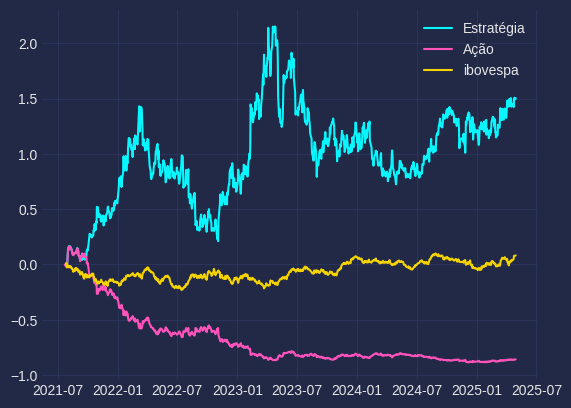

In [47]:
plt.plot(tabela_de_dados["retorno_acumulado_modelo"], label = "Estratégia")
plt.plot(tabela_de_dados["retorno_acum_acao"], label = "Ação")
plt.plot(tabela_de_dados["retorno_acum_ibov"], label = "ibovespa")
plt.legend()
plt.show()